In [1]:
import pandas as pd
import shutil
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.read_csv('HandInfo.csv')
df 

,id,age,gender,skinColor,accessories,nailPolish,aspectOfHand,imageName,irregularities
0,0,27,male,fair,0,0,dorsal right,Hand_0000002.jpg,0
1,0,27,male,fair,0,0,dorsal right,Hand_0000003.jpg,0
2,0,27,male,fair,0,0,dorsal right,Hand_0000004.jpg,0
3,0,27,male,fair,0,0,dorsal right,Hand_0000005.jpg,0
4,0,27,male,fair,0,0,dorsal right,Hand_0000006.jpg,0
...,...,...,...,...,...,...,...,...,...
11071,1589,22,female,fair,0,0,palmar left,Hand_0011740.jpg,0
11072,1589,22,female,fair,0,0,palmar left,Hand_0011741.jpg,0
11073,1589,22,female,fair,0,0,palmar left,Hand_0011742.jpg,0
11074,1589,22,female,fair,0,0,palmar left,Hand_0011743.jpg,0


In [3]:
# From df, `imageName` and `gender` columns are selected

df = df[["imageName", "gender"]]

# Split the data into training and testing sets

train_df = df.sample(frac=0.65, random_state=0)
test_df = df.drop(train_df.index)

# delete train and test directories if they exist
shutil.rmtree("train", ignore_errors=True)
shutil.rmtree("test", ignore_errors=True)

# Create directories
os.makedirs("train/male", exist_ok=True)
os.makedirs("train/female", exist_ok=True)
os.makedirs("test/male", exist_ok=True)
os.makedirs("test/female", exist_ok=True)

for index, row in train_df.iterrows():
    shutil.copy(
        f'Hands/{row["imageName"]}', f"train/{row['gender']}/{row['imageName']}"
    )

for index, row in test_df.iterrows():
    shutil.copy(f'Hands/{row["imageName"]}', f"test/{row['gender']}/{row['imageName']}")

In [4]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(300, 300, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/ashrock_m13/Developer/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 270000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    34,560,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,560,257 (131.84 MB)

 Trainable params: 34,560,257 (131.84 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 7199 images belonging to 2 classes.
Found 3877 images belonging to 2 classes.


In [6]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator, steps_per_epoch=8)

Epoch 1/5


/Users/ashrock_m13/Developer/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.5600 - loss: 103.5811 - val_accuracy: 0.6471 - val_loss: 65.0925
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.5985 - loss: 49.0983 - val_accuracy: 0.6471 - val_loss: 19.0180
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.5728 - loss: 15.7134 - val_accuracy: 0.6840 - val_loss: 5.4507
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.6052 - loss: 4.6987 - val_accuracy: 0.7003 - val_loss: 5.2797
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.6999 - loss: 4.7567 - val_accuracy: 0.7521 - val_loss: 1.7705


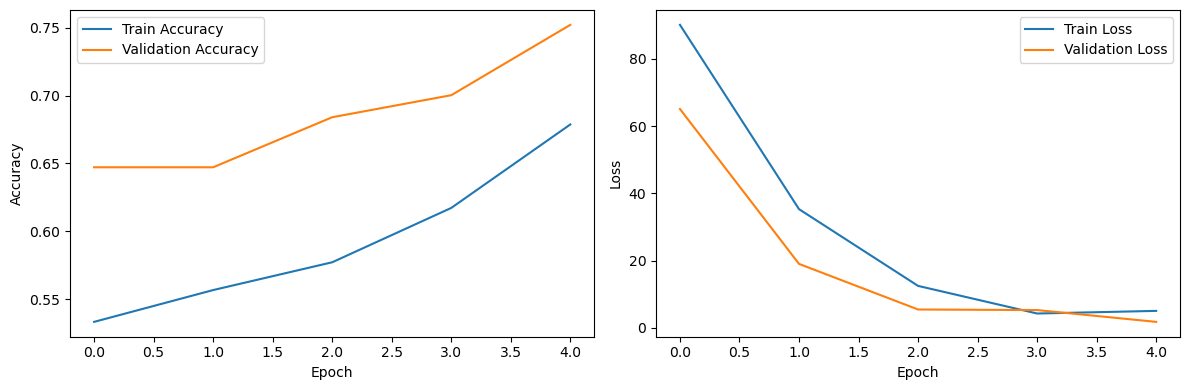

In [8]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history(history)